#Facebook Ads Campaing Analysis

Most e-commerce businesses rely on social media campaigns. On this project we will analyize previous campaigns that were depolyed for this company. The owner has noticed a decrease of intrested people in the ads compared to previous campaigns. 

In [1]:
#Imports needed for this project 

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from dateutil import parser
from pandas_profiling import ProfileReport






In [2]:
# Importing raw data from Facebook Ads Manager
df = pd.read_csv("E:\GitHub\Art Business\Pandas Analysis\Art-Business-Campaigns-Mar-9-2019-Apr-9-2022.csv")


Whenever exploring data a good idea might be to do a Pandas Profiling on the data set. On this case we have a lot of information. A few of the columns might not be too relevant to run through the Profiling. We will try to clean up the most crucial data that we can run, that ultimately will point us in the right direction. 

In [3]:
#Creating dataframe for profiling. 

df_profiling = df[[
    'Campaign ID','Starts','Ends',
    'Ad set budget','Results','Reach',
    'Impressions','Cost per results',
    'Amount spent (MXN)','Result rate',
    'New messaging connections',
    'Messaging Conversations Started',
    'Frequency','CPC (All) (MXN)','CTR (all)'
    ]].copy()

In [4]:
# First let's make sure we have datetime objects for both columns "Starts" & "Ends"
df_profiling[['Starts', 'Ends']] = df_profiling[['Starts', 'Ends']].apply(pd.to_datetime)

#Now let's make sure we are only passing months of the year to have a more accurate view of the dates
df_profiling['Starts'] = df_profiling['Starts'].dt.strftime('%m')
df_profiling['Ends'] = df_profiling['Ends'].dt.strftime('%m')



In [5]:
# Once we are sure we have the right dtype and format for the dates we  can go ahead and run the Profiling Tool

#prof = ProfileReport(df_profiling)
#prof.to_file(output_file='output.html')

For the current business model (after a discussion with the owner), it is clear that 99% of the business comes from new messages. Once a customer initiates a new conversation it is usually because they are intrested in signing up for the class. This being the case we need to focus first on 'New Messages' and 'Messages Initiated' in order to make a more educated decision on where to go next.  

In [6]:
# We will analyze both metrics New Messages and Messages Initiated
# New Messaging Connections: The number of people your business added as messaging connections
# Messaging Conversations Started: The number of times people started messaging your business after at least 7 days of inactivity

df_new_messages = df_profiling[['New messaging connections',
    'Amount spent (MXN)', 'Results', 'Reach', 'Impressions','Frequency']].copy()

df_messages_init = df_profiling[['Messaging Conversations Started',
    'Amount spent (MXN)', 'Results', 'Reach', 'Impressions','Frequency']].copy()



C:\Users\mosco\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mosco\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='New messaging connections', ylabel='Density'>

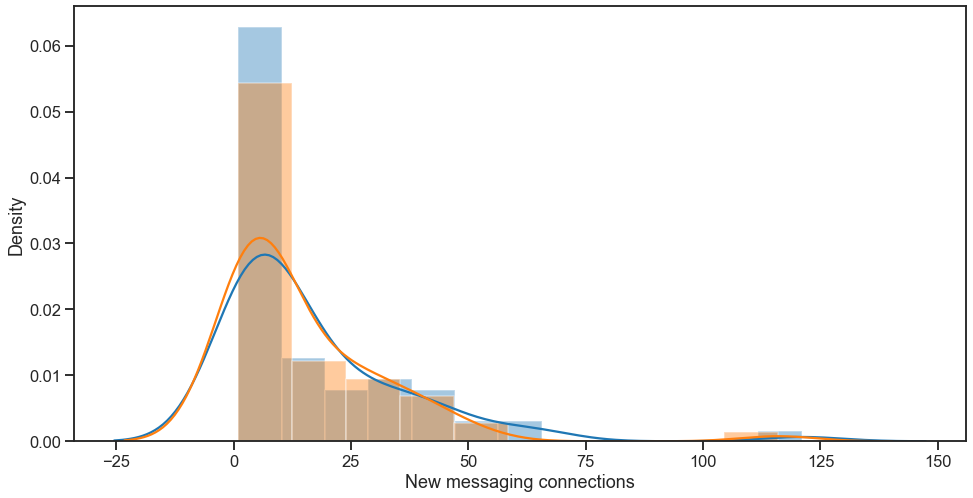

In [7]:
# Lets try to visualize how the Amount Spent affects New Messages and Conversations Started

sns.set_style('ticks')
plt.figure(figsize=(16,8))
sns.set_context('talk')

sns.distplot(df_messages_init['Messaging Conversations Started'])
sns.distplot(df_new_messages['New messaging connections'], bins=10)

## First Objective: Look at qualities of successful campaigns. 

Let's try to define "success" when it comes to an Ads campaign for this business in particular. 

In [8]:
# Let's look at the average new messages and conversations started. This along with the average amount spent on a campaign

x = df_profiling['New messaging connections'].mean()
y = df_profiling['Messaging Conversations Started'].mean()
z = df_profiling['Amount spent (MXN)'].mean()

print('New Messaging Avg: ' + str(x))
print('New Connections: ' + str(y))
print('Spent Avg: ' + str(z))



New Messaging Avg: 15.046875
New Connections: 17.10144927536232
Spent Avg: 232.60091954022997


Now that we have a very good idea of what  the average is.
We will split the data into two sets. Above average and below average. 
For this next step we will focus on New Messages since the other metric (even though will be used down the road) is only counting interactions after 7 days of inactivity.

In [9]:
successful_camp = df[(df['New messaging connections'] >= 15)].copy()

unsuccessful_camp = df[(df['New messaging connections']) < 15].copy()

print(successful_camp['Starts'].count())
print(unsuccessful_camp['Starts'].count())

22
42


Now we know we have 22 campaigns that are more successful than the average campaing. Let's start comparing each group see if we can find any correlations between a successful and unsuccessful campaign. 

In [10]:
# Let's add a new column to each DF that will mark a campaing either 'S' or 'U' based on 
# the number of New Messages
# S: Successful
# U: Unsuccessful
df_new_messages['Outcome'] = np.where(df['New messaging connections'] >= 15, 'S','U')


C:\Users\mosco\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1152x1152 with 0 Axes>

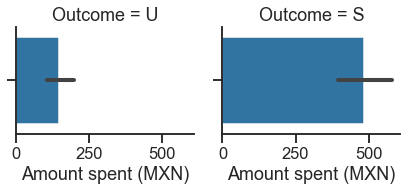

In [11]:
plt.figure(figsize=(16,16))
g = sns.FacetGrid(df_new_messages, col='Outcome')
g.map(sns.barplot, 'Amount spent (MXN)')

### Found a clear indicator of what can potentially dictate a successful campaign. 
Lets try to understand this a bit better. How many outlayers do we have on each scenario. 

<Figure size 1440x1152 with 0 Axes>

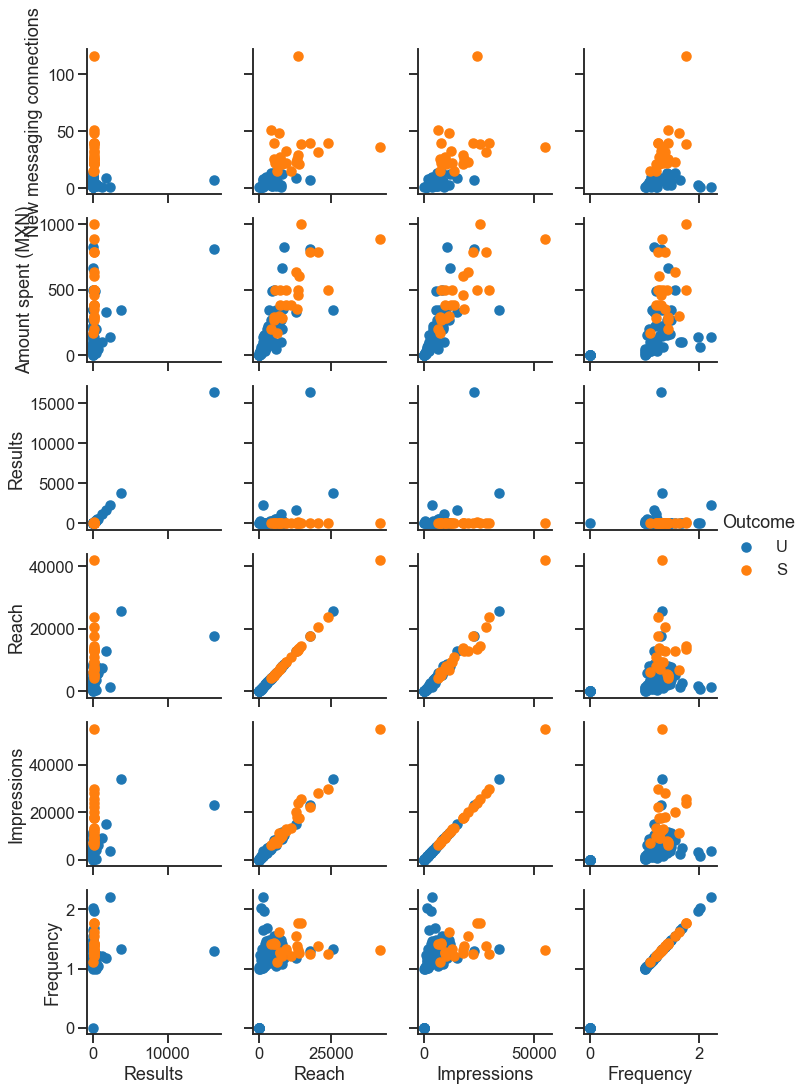

In [12]:
plt.figure(figsize=(20,16))
newMessages_g = sns.PairGrid(df_new_messages, hue='Outcome',
                                    x_vars=['Results','Reach','Impressions','Frequency']
                                    )
newMessages_g.map(plt.scatter)
newMessages_g.add_legend()

### New Findings
On the above grid we discovered a clear effect between 'S' and 'U' campaigns when it comes to frequency, impressions and reach. However, we already discovered that reach and impressions are highly related to the amount spent. Which we also stablished to be a main factor. So let's dive a little more into 'Frequency' to see if we can determine an optimal range for future campaigns. 

Frequency is a metric to communicate how ofet the same user sees an add. I think in order to see if we can see if there is a relation between Frequency and the amount of time a campaing last will be an important factor to determine wether we could potentially benefit from increasing frequency or not. This, along with the best duration of a campaign will be important factors to answer the question "Are we using the optimal Freqency setting for these campaigns?"

In [17]:
# Creating new DF to analyze avg. day a campaign is run. 

df_frequency = df[df.Reach != 0]
df_frequency = df_frequency.dropna()
df_frequency = df_frequency.reset_index(drop = True)

# Create the same category to differentiate between sucessful and unsuccessful campaigns. 
df_frequency['Outcome'] = np.where(df_frequency['New messaging connections'] >= 15, 'S','U')

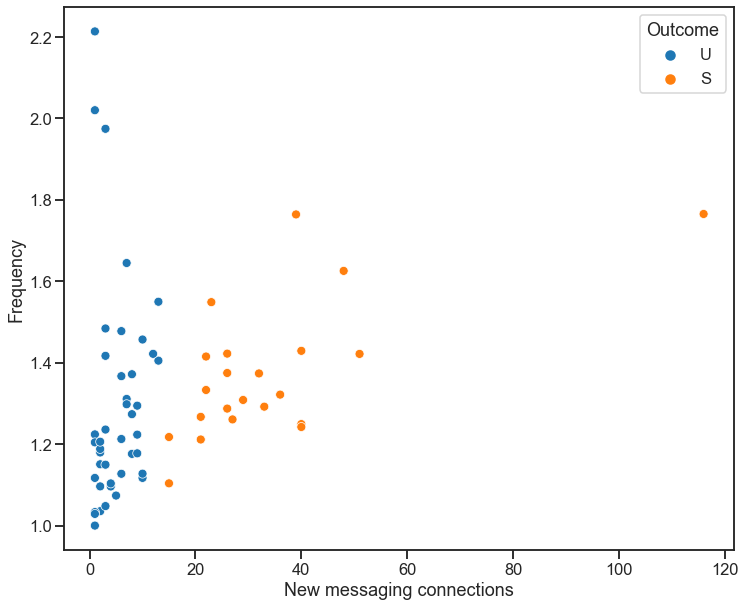

In [19]:
# Let's do a scatter plot to know the exact number needed in Frequency to have a successful campaing

plt.figure(figsize=(12,10))
durationPlot = sns.scatterplot(x = "New messaging connections", y = "Frequency", data= df_frequency, hue="Outcome")

In [13]:
# Creating new DF to analyze avg. day a campaign is run. 

df_duration = df[df.Reach != 0]
df_duration = df_duration.dropna()
df_duration = df_duration.reset_index(drop = True)



In [14]:
# Create the same category to differentiate between sucessful and unsuccessful campaigns. 
df_duration['Outcome'] = np.where(df_duration['New messaging connections'] >= 15, 'S','U')

# Here we are going to clean up the formatting for the dates we have on our data frame
df_duration['Starts'] = pd.to_datetimedf_duration['Starts'], infer_datetime_format=True)
df_duration['Ends'] = pd.to_datetime(df_duration['Ends'], infer_datetime_format=True)

# Now we create a new column with the duration of days of each campaing
df_duration['Duration'] = (df_duration['Ends'] - df_duration['Starts']).dt.days

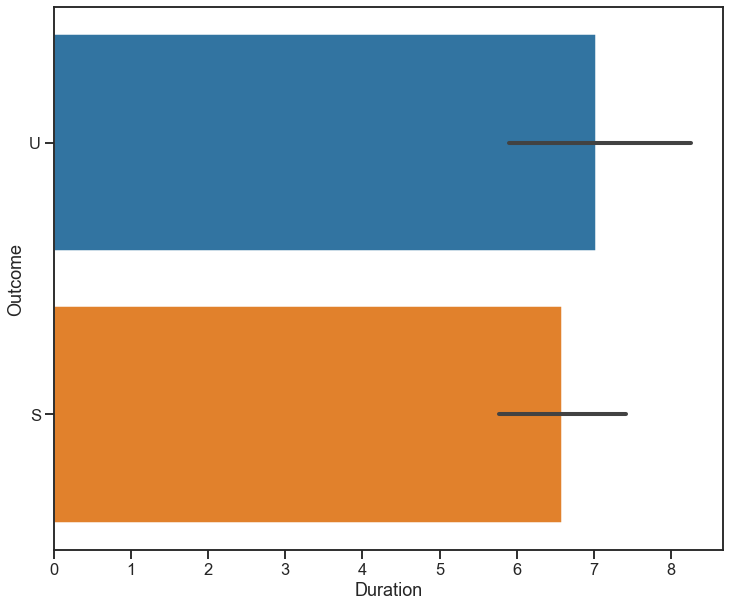

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'Duration', y = 'Outcome', data=df_duration)
plt.show()

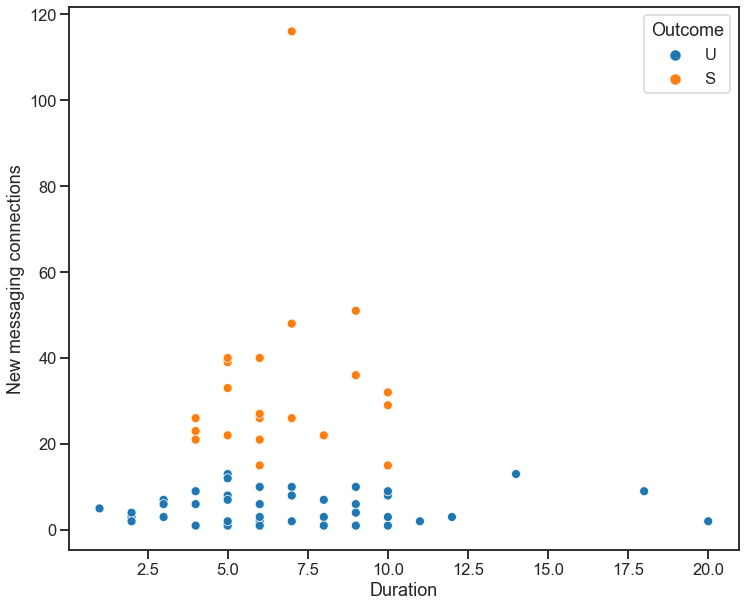

In [16]:
plt.figure(figsize=(12,10))
durationPlot = sns.scatterplot(x = "Duration", y = "New messaging connections", data= df_duration, hue="Outcome")


Both the bar plot and the scatter plot show that there is no clear definition on a target amount of time a campaign should last to land on the Successful bin. With this data, the only thing we can safely assume is, a campaing should not last longer than 10 days to have better odds at being successful. 

## Final Thoughts

From our preliminary research we found that the owner of this business will need to apply the following steps to improve the campaigns

- Frequency should be set to be around 1.2 - 1.6
- Allow campaings to run until the allocated budget is used
- Only two options for campaing budgets so far:
    - Spend under 200 MXN (since the avg results are the same for anything under 450~ MXN)
    - Optimal to set a budget of over 500 MXN for each campaign
- The duration of each campaign should be under 10 days

